# CSCI 184 Machine Learning Final Project: Inflation Detector
# Group Members: Arjun Chimni, Patrick Callahan, Andrew Schulz


## Project Idea: 	
  >With the recent CPI numbers coming out and a recession on the loom, we wanted to identify what conditions cause inflation before the inflation happens. We think that this topic is especially pertinent at the current moment. We want to identify the features/conditions under which inflation happens and try to predict if there will be inflation to the money supply. 
  
  >To do this, we will analyze employment data, CPI (consumer price index), PPI (producer price index), and confidence indexes in order to obtain an idea about what causes inflation and how to detect it early. We will train historical data of all these features to draw conclusions.
  
  > Ideally, the program will be able to suggest some sort of action in order to combat inflation or just general advice for the average consumer heading into a high inflation landscape.



## Step 1: Upload the the .csv files that we will be using for the project
> Here we used data from the following sources: 
* https://www.kaggle.com/datasets/varpit94/us-inflation-data-updated-till-may-2021 : U.S. Inflation Data
* https://www.kaggle.com/datasets/federalreserve/interest-rates : Federal Reserve INterest Rates (1954-Present)
* https://www.kaggle.com/datasets/ambrosm/oecd-consumer-confidence-index : OECD Consumer Confidence Index
    

In [1]:
import pandas as pd
import csv

#opening the data and initializing the variables associated with the data. 
inflation_dt = pd.read_csv("US CPI.csv")
fed_res_inrts = pd.read_csv("index.csv")
cus_conf_index = pd.read_csv("cus_conf_index.csv")


In [2]:
# Now we want to initially convert the data into a dataframe so we can explore how we should begin preprocessing the data. 

inflation_dt_df = pd.DataFrame(data = inflation_dt)
fed_res_inrts_df = pd.DataFrame(data = fed_res_inrts)
cus_conf_index_df = pd.DataFrame(data = cus_conf_index)

In [3]:
# Now that the data is of the dataframe type, we can explore the features and understand the target variable that we are looking to predict
print("These are the columns and datatypes for 'U.S. Inflation Data' dataset: ")
print(inflation_dt_df.dtypes)
print("The shape of the dataframe is: ", inflation_dt_df.shape)
print()
print("These are the columns and datatypes for 'Federal Reserve INterest Rates (1954-Present)' dataset: ")
print(fed_res_inrts_df.dtypes)
print("The shape of the dataframe is: ", fed_res_inrts_df.shape)
print()
print("These are the columns and datatypes for 'OECD Consumer Confidence Index' dataset: ")
print(cus_conf_index_df.dtypes)
print("The shape of the dataframe is: ", cus_conf_index_df.shape)
print()

These are the columns and datatypes for 'U.S. Inflation Data' dataset: 
Yearmon     object
CPI        float64
dtype: object
The shape of the dataframe is:  (1303, 2)

These are the columns and datatypes for 'Federal Reserve INterest Rates (1954-Present)' dataset: 
Year                              int64
Month                             int64
Day                               int64
Federal Funds Target Rate       float64
Federal Funds Upper Target      float64
Federal Funds Lower Target      float64
Effective Federal Funds Rate    float64
Real GDP (Percent Change)       float64
Unemployment Rate               float64
Inflation Rate                  float64
dtype: object
The shape of the dataframe is:  (904, 10)

These are the columns and datatypes for 'OECD Consumer Confidence Index' dataset: 
LOCATION       object
INDICATOR      object
SUBJECT        object
MEASURE        object
FREQUENCY      object
TIME           object
Value         float64
Flag Codes    float64
dtype: object
The s

## Step 2: Merging the Data
> Before we begin with full preprocessing, we want to merge all the data sets together into one ordered dataset so we can observe the power of all the features when building out our predictive model. 

> To do this, we noticed that all the datasets have a date/time feature that we can use to align the datasets and match the data. The following code is the process we took to do this. 

#  Separating the Data into only the USA

In [4]:
usa_index_df = cus_conf_index_df.drop(cus_conf_index_df[cus_conf_index_df["LOCATION"] != "USA"].index)
usa_index_df

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
6152,USA,CCI,AMPLITUD,LTRENDIDX,M,1960-01,101.68200,NaN
6153,USA,CCI,AMPLITUD,LTRENDIDX,M,1960-02,101.40060,NaN
6154,USA,CCI,AMPLITUD,LTRENDIDX,M,1960-03,101.15750,NaN
6155,USA,CCI,AMPLITUD,LTRENDIDX,M,1960-04,101.02340,NaN
6156,USA,CCI,AMPLITUD,LTRENDIDX,M,1960-05,101.05730,NaN
...,...,...,...,...,...,...,...,...
6891,USA,CCI,AMPLITUD,LTRENDIDX,M,2021-08,98.45681,NaN
6892,USA,CCI,AMPLITUD,LTRENDIDX,M,2021-09,98.12675,NaN
6893,USA,CCI,AMPLITUD,LTRENDIDX,M,2021-10,97.92135,NaN
6894,USA,CCI,AMPLITUD,LTRENDIDX,M,2021-11,97.77589,NaN


In [5]:
import datetime

def restructure(dataset, columns):
    if len(columns) > 1: 
        dataset[columns[0]] = dataset[columns[0]].astype(str)
        dataset['Temp'] = dataset[columns[1]].astype(str)
        for i in dataset['Temp'].index: 
            if len(dataset['Temp'].iloc[i]) < 2:  
                dataset[columns[1]].iloc[i] = '0' + dataset['Temp'].iloc[i]
            else: 
                dataset[columns[1]].iloc[i] = dataset['Temp'].iloc[i]
        dataset['Year-Month'] = dataset[columns[0]] + "-" + dataset[columns[1]]
        del dataset['Temp']
        del dataset[columns[0]]
        del dataset[columns[1]]
    else: 
        format = "%Y-%m"
        res = True
        try: 
            res = bool(datetime.datetime.strptime(dataset[columns[0]][0], format))
        except: 
            res = False
        print(str(res))
        if res == False:
            dataset['Year-Month'] = 0
            for i in dataset[columns[0]].index:
                date = datetime.datetime.strptime(dataset[columns[0]].iloc[i], '%m-%d-%Y') 
                dataset['Year-Month'].iloc[i] = datetime.date.strftime(date, "%Y-%m")
        else:
            dataset['Year-Month'] = dataset[columns[0]]
        del dataset[columns[0]]
        
    return dataset

In [6]:
restructure(fed_res_inrts_df, ['Year', 'Month']) #Run the function on the first

C:\Users\andre\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate,Year-Month
0,1,NaN,NaN,NaN,0.80,4.6,5.8,NaN,1954-07
1,1,NaN,NaN,NaN,1.22,NaN,6.0,NaN,1954-08
2,1,NaN,NaN,NaN,1.06,NaN,6.1,NaN,1954-09
3,1,NaN,NaN,NaN,0.85,8.0,5.7,NaN,1954-10
4,1,NaN,NaN,NaN,0.83,NaN,5.3,NaN,1954-11
...,...,...,...,...,...,...,...,...,...
899,14,NaN,0.75,0.50,NaN,NaN,NaN,NaN,2016-12
900,1,NaN,0.75,0.50,0.65,NaN,4.8,2.3,2017-01
901,1,NaN,0.75,0.50,0.66,NaN,4.7,2.2,2017-02
902,1,NaN,0.75,0.50,NaN,NaN,NaN,NaN,2017-03


In [7]:
restructure(inflation_dt_df, ['Yearmon'])

False


C:\Users\andre\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,CPI,Year-Month
0,9.800,1913-01
1,9.800,1913-01
2,9.800,1913-01
3,9.800,1913-01
4,9.700,1913-01
...,...,...
1298,264.877,2021-01
1299,267.054,2021-01
1300,269.195,2021-01
1301,271.696,2021-01


In [8]:
restructure(cus_conf_index_df, ['TIME'])

True


,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Value,Flag Codes,Year-Month
0,NLD,CCI,AMPLITUD,LTRENDIDX,M,101.50280,NaN,1973-01
1,NLD,CCI,AMPLITUD,LTRENDIDX,M,101.48150,NaN,1973-02
2,NLD,CCI,AMPLITUD,LTRENDIDX,M,101.30810,NaN,1973-03
3,NLD,CCI,AMPLITUD,LTRENDIDX,M,101.01730,NaN,1973-04
4,NLD,CCI,AMPLITUD,LTRENDIDX,M,100.84560,NaN,1973-05
...,...,...,...,...,...,...,...,...
18221,CRI,CCI,AMPLITUD,LTRENDIDX,M,98.93296,NaN,2021-07
18222,CRI,CCI,AMPLITUD,LTRENDIDX,M,99.29540,NaN,2021-08
18223,CRI,CCI,AMPLITUD,LTRENDIDX,M,99.49060,NaN,2021-09
18224,CRI,CCI,AMPLITUD,LTRENDIDX,M,99.57128,NaN,2021-10


In [9]:
usa_index_df = cus_conf_index_df.drop(cus_conf_index_df[cus_conf_index_df["LOCATION"] != "USA"].index)
usa_index_df

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Value,Flag Codes,Year-Month
6152,USA,CCI,AMPLITUD,LTRENDIDX,M,101.68200,NaN,1960-01
6153,USA,CCI,AMPLITUD,LTRENDIDX,M,101.40060,NaN,1960-02
6154,USA,CCI,AMPLITUD,LTRENDIDX,M,101.15750,NaN,1960-03
6155,USA,CCI,AMPLITUD,LTRENDIDX,M,101.02340,NaN,1960-04
6156,USA,CCI,AMPLITUD,LTRENDIDX,M,101.05730,NaN,1960-05
...,...,...,...,...,...,...,...,...
6891,USA,CCI,AMPLITUD,LTRENDIDX,M,98.45681,NaN,2021-08
6892,USA,CCI,AMPLITUD,LTRENDIDX,M,98.12675,NaN,2021-09
6893,USA,CCI,AMPLITUD,LTRENDIDX,M,97.92135,NaN,2021-10
6894,USA,CCI,AMPLITUD,LTRENDIDX,M,97.77589,NaN,2021-11


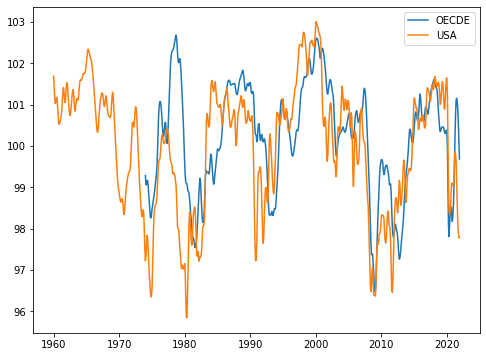

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(8, 6))

dateval = usa_index_df[["Year-Month", "Value"]]

usadate = pd.to_datetime(dateval["Year-Month"])

#can change df["Location"] to any other country to compare the two graphs

OECDE_index = cus_conf_index_df.drop(cus_conf_index_df[cus_conf_index_df["LOCATION"] != "OECDE"].index)

datevalOECDE = OECDE_index[["Year-Month", "Value"]]

date = pd.to_datetime(datevalOECDE["Year-Month"])
date

plt.plot(date, datevalOECDE["Value"], label = "OECDE")
plt.plot(usadate, dateval["Value"], label = "USA")
plt.legend()

# Merging fully

In [11]:
merged = pd.merge(usa_index_df, inflation_dt_df, how = 'outer', on = 'Year-Month')
merged

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Value,Flag Codes,Year-Month,CPI
0,USA,CCI,AMPLITUD,LTRENDIDX,M,101.682,NaN,1960-01,29.3
1,USA,CCI,AMPLITUD,LTRENDIDX,M,101.682,NaN,1960-01,29.4
2,USA,CCI,AMPLITUD,LTRENDIDX,M,101.682,NaN,1960-01,29.4
3,USA,CCI,AMPLITUD,LTRENDIDX,M,101.682,NaN,1960-01,29.5
4,USA,CCI,AMPLITUD,LTRENDIDX,M,101.682,NaN,1960-01,29.5
...,...,...,...,...,...,...,...,...,...
1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1959-01,29.2
1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1959-01,29.3
1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1959-01,29.4
1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1959-01,29.4


In [12]:
final_data = pd.merge(merged, fed_res_inrts_df, how = 'outer', on = 'Year-Month')
final_data

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Value,Flag Codes,Year-Month,CPI,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
0,USA,CCI,AMPLITUD,LTRENDIDX,M,101.682,NaN,1960-01,29.3,1.0,NaN,NaN,NaN,3.99,9.2,5.2,2.0
1,USA,CCI,AMPLITUD,LTRENDIDX,M,101.682,NaN,1960-01,29.4,1.0,NaN,NaN,NaN,3.99,9.2,5.2,2.0
2,USA,CCI,AMPLITUD,LTRENDIDX,M,101.682,NaN,1960-01,29.4,1.0,NaN,NaN,NaN,3.99,9.2,5.2,2.0
3,USA,CCI,AMPLITUD,LTRENDIDX,M,101.682,NaN,1960-01,29.5,1.0,NaN,NaN,NaN,3.99,9.2,5.2,2.0
4,USA,CCI,AMPLITUD,LTRENDIDX,M,101.682,NaN,1960-01,29.5,1.0,NaN,NaN,NaN,3.99,9.2,5.2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1959-08,NaN,1.0,NaN,NaN,NaN,3.50,NaN,5.2,2.0
2314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1959-09,NaN,1.0,NaN,NaN,NaN,3.76,NaN,5.5,2.4
2315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1959-10,NaN,1.0,NaN,NaN,NaN,3.98,1.6,5.7,2.7
2316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1959-11,NaN,1.0,NaN,NaN,NaN,4.00,NaN,5.8,2.0


In [13]:
final_data = final_data.drop(["LOCATION", "SUBJECT", "INDICATOR", "MEASURE", "FREQUENCY", "Day", "Flag Codes"], axis = 1)
final_data

,Value,Year-Month,CPI,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
0,101.682,1960-01,29.3,NaN,NaN,NaN,3.99,9.2,5.2,2.0
1,101.682,1960-01,29.4,NaN,NaN,NaN,3.99,9.2,5.2,2.0
2,101.682,1960-01,29.4,NaN,NaN,NaN,3.99,9.2,5.2,2.0
3,101.682,1960-01,29.5,NaN,NaN,NaN,3.99,9.2,5.2,2.0
4,101.682,1960-01,29.5,NaN,NaN,NaN,3.99,9.2,5.2,2.0
...,...,...,...,...,...,...,...,...,...,...
2313,NaN,1959-08,NaN,NaN,NaN,NaN,3.50,NaN,5.2,2.0
2314,NaN,1959-09,NaN,NaN,NaN,NaN,3.76,NaN,5.5,2.4
2315,NaN,1959-10,NaN,NaN,NaN,NaN,3.98,1.6,5.7,2.7
2316,NaN,1959-11,NaN,NaN,NaN,NaN,4.00,NaN,5.8,2.0


# Replacing NaN values

In [14]:
import numpy as np
print(final_data.isnull().sum())
for i in final_data.columns: 
    if final_data[i].isnull().sum():
        print("Column name: ", i, ". Max value: ", final_data[i].max(), ". Min value: ", final_data[i].min(),".")
        final_data[i] = final_data[i].fillna(final_data[i].mean())

final_data

Value                            625
Year-Month                         0
CPI                              883
Federal Funds Target Rate       1449
Federal Funds Upper Target      2116
Federal Funds Lower Target      2116
Effective Federal Funds Rate     873
Real GDP (Percent Change)       1386
Unemployment Rate                873
Inflation Rate                   948
dtype: int64
Column name:  Value . Max value:  103.0087 . Min value:  95.83624 .
Column name:  CPI . Max value:  273.003 . Min value:  9.7 .
Column name:  Federal Funds Target Rate . Max value:  11.5 . Min value:  1.0 .
Column name:  Federal Funds Upper Target . Max value:  1.0 . Min value:  0.25 .
Column name:  Federal Funds Lower Target . Max value:  0.75 . Min value:  0.0 .
Column name:  Effective Federal Funds Rate . Max value:  19.1 . Min value:  0.07 .
Column name:  Real GDP (Percent Change) . Max value:  16.5 . Min value:  -10.0 .
Column name:  Unemployment Rate . Max value:  10.8 . Min value:  3.4 .
Column name:  I

,Value,Year-Month,CPI,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
0,101.682000,1960-01,29.300000,5.581056,0.320545,0.070545,3.99,9.200000,5.2,2.0
1,101.682000,1960-01,29.400000,5.581056,0.320545,0.070545,3.99,9.200000,5.2,2.0
2,101.682000,1960-01,29.400000,5.581056,0.320545,0.070545,3.99,9.200000,5.2,2.0
3,101.682000,1960-01,29.500000,5.581056,0.320545,0.070545,3.99,9.200000,5.2,2.0
4,101.682000,1960-01,29.500000,5.581056,0.320545,0.070545,3.99,9.200000,5.2,2.0
...,...,...,...,...,...,...,...,...,...,...
2313,100.068013,1959-08,89.610576,5.581056,0.320545,0.070545,3.50,3.151502,5.2,2.0
2314,100.068013,1959-09,89.610576,5.581056,0.320545,0.070545,3.76,3.151502,5.5,2.4
2315,100.068013,1959-10,89.610576,5.581056,0.320545,0.070545,3.98,1.600000,5.7,2.7
2316,100.068013,1959-11,89.610576,5.581056,0.320545,0.070545,4.00,3.151502,5.8,2.0


In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

y = final_data["CPI"]

f_data = final_data.drop(["CPI", "Year-Month"], axis = 1)

X = f_data

X_best = SelectKBest(score_func=f_regression, k = 5)
z = X_best.fit_transform(X, y)

# Testing a Neural Network on our Dataset

In [16]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

dffinal = pd.DataFrame(data = z, columns = ["Federal Funds Target Rate", "Effective Federal Funds Rate", "Real GDP", "Unemployment Rate", "Inflation Rate"])

x_train, x_test, y_train, y_test = train_test_split(dffinal, y, test_size = .25)
print(x_train.shape)
model = Sequential()

#hidden layer
model.add(Dense(10, input_dim = 5, activation = "sigmoid"))

model.add(Dense(1 , activation = 'sigmoid'))

model.compile(loss = 'mean_squared_error', optimizer = "sgd", metrics = ["accuracy"])

model.fit(x_train, y_train, epochs = 10, batch_size = 1)

predictions = model.predict(x_test)

model.evaluate(x_test, y_test)

(1738, 5)
Epoch 1/10
1738/1738 [==============================] - 4s 2ms/step - loss: 11743.3545 - accuracy: 0.0000e+00
Epoch 2/10
1738/1738 [==============================] - 4s 2ms/step - loss: 11743.2715 - accuracy: 0.0000e+00
Epoch 3/10
1738/1738 [==============================] - 4s 2ms/step - loss: 11743.2646 - accuracy: 0.0000e+00
Epoch 4/10
1738/1738 [==============================] - 3s 2ms/step - loss: 11743.2637 - accuracy: 0.0000e+00
Epoch 5/10
1738/1738 [==============================] - 3s 2ms/step - loss: 11743.2588 - accuracy: 0.0000e+00
Epoch 6/10
1738/1738 [==============================] - 3s 2ms/step - loss: 11743.2705 - accuracy: 0.0000e+00
Epoch 7/10
1738/1738 [==============================] - 4s 2ms/step - loss: 11743.2637 - accuracy: 0.0000e+00
Epoch 8/10
1738/1738 [==============================] - 3s 2ms/step - loss: 11743.2500 - accuracy: 0.0000e+00
Epoch 9/10
1738/1738 [==============================] - 3s 2ms/step - loss: 11743.2607 - accuracy: 0.0000e+00


[12229.0107421875, 0.0]